In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

col_names=['area','room','price']
dataset=pd.read_csv("https://raw.githubusercontent.com/nishithkotak/machine-learning/master/ex1data2.txt",names=col_names)
dataset

,area,room,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [2]:
dataset.describe()

,area,room,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [3]:
area=dataset.iloc[:,0:1]

In [4]:
room=dataset.iloc[:,1:2]

In [5]:
price=dataset.iloc[:,2:3]

In [9]:
#Feature Normalization
def feature_normalization(X):
  mean=np.mean(X,axis=0)
  std=np.std(X,axis=0)
  x_norm=(X-mean)/ std

  return x_norm,mean,std


In [10]:
data_norm=dataset.values
m=len(data_norm[:,0])

In [11]:
x_in=data_norm[:,0:2].reshape(m,2)
X2,mean_X2,std_X2=feature_normalization(x_in)
X2

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [12]:
Y2=data_norm[:,2:3]

In [13]:
#ML Model
def hypothesis(theta_array,x1,x2):
  return (theta_array[0] + theta_array[1]*x1 + theta_array[2]*x2)

In [14]:
def costfunction(theta_array,x1,x2,y,m):
  total_cost = 0
  for i in range(m):
    total_cost+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])**2
  return total_cost/(2*m)

In [15]:
def gradient_descent(theta_array,x1,x2,y,m,alpha):
  summation_0=0
  summation_1=0
  summation_2=0
  for i in range(m):
    summation_0+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])
    summation_1+=((theta_array[0]+(theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])*x1[i])
    summation_2+=((theta_array[0]+(theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])*x2[i])


  new_theta0=theta_array[0] -(summation_0*alpha/m)
  new_theta1=theta_array[1] -(summation_1*alpha/m)
  new_theta2=theta_array[2] -(summation_2*alpha/m)

  improvised_theta=[new_theta0,new_theta1,new_theta2]
  #print(improvised_theta)
  return improvised_theta

In [16]:
def training(x1,x2, y, alpha, epochs):
  theta_0=0
  theta_1=0
  theta_2=0
  m=x1.size
  cost_values=[]
  theta_array=[theta_0,theta_1,theta_2]
  for i in range(epochs):
    theta_array=gradient_descent(theta_array,x1,x2,y,m,alpha)
    loss=costfunction(theta_array,x1,x2, y, m)
    cost_values.append(loss)


  x=np.arange(epochs)
  plt.plot(x,cost_values)
  plt.show()
  return theta_array


In [17]:
alpha=0.01
epochs=500

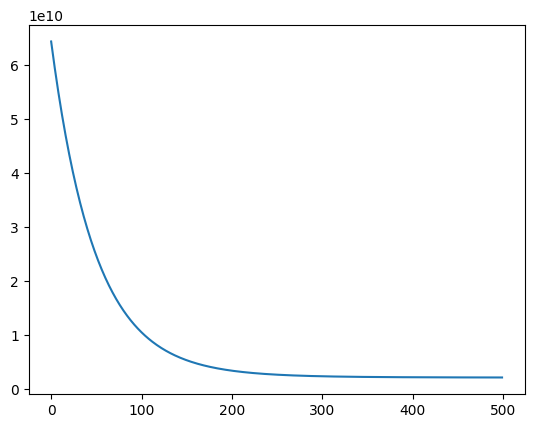

In [18]:
theta_array=training(X2[:,0:1],X2[:,1:2],Y2,alpha,epochs)

In [19]:
theta_array

[array([338175.98396731]), array([103032.12432974]), array([-202.3252331])]

In [20]:
hypothesis(theta_array,4,2100)

array([325421.49176854])